# IMPORTS!
We begin, as always, as the begining.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as plt
import seaborn as sns
import scipy 
import folium
import json

In [2]:
%matplotlib inline

In [3]:
#next up is the path
path=r'C:\Users\evras\Desktop\Project A6\01 Data'
geo_bnb=r'C:\Users\evras\Desktop\Project A6\01 Data\01 Original\cities_finally.json'

In [4]:
df_bnb=pd.read_pickle(os.path.join(path,'02 Altered','us_airbnb_2020_clean.pkl'))

In [5]:
df_bnb.columns

Index(['listing_id', 'listing_name', 'host_id', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'city', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
df_bnb.shape

(226000, 16)

In [7]:
df_bnb.head()

,listing_id,listing_name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,city,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,38585,Charming Victorian home - twin beds + breakfast,165529,None,28804,35.65146,-82.62792,Asheville,Private room,60,1,138,16/02/20,1.14,1,0
1,80905,French Chic Loft,427027,None,28801,35.59779,-82.55540,Asheville,Entire home/apt,470,1,114,7/9/2020,1.03,11,288
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,None,28801,35.60670,-82.55563,Asheville,Entire home/apt,75,30,89,30/11/19,0.81,2,298
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,None,28806,35.57864,-82.59578,Asheville,Entire home/apt,90,1,267,22/09/20,2.39,5,0
4,160594,Historic Grove Park,769252,None,28801,35.61442,-82.54127,Asheville,Private room,125,30,58,19/10/15,0.52,1,0


In [8]:
df_bnb['city'].value_counts().sort_index(ascending=True)

Asheville             2074
Austin               10436
Boston                3339
Broward County       10857
Cambridge             1028
Chicago               6397
Clark County          8408
Columbus              1409
Denver                4200
Hawaii               22434
Jersey City           2488
Los Angeles          31534
Nashville             6139
New Orleans           6408
New York City        45738
Oakland               3204
Pacific Grove          179
Portland              4281
Rhode Island          3884
Salem                  202
San Clara Country     7090
San Diego            12404
San Francisco         7052
San Mateo County      2855
Santa Cruz County     1571
Seattle               6575
Twin Cities MSA       6465
Washington D.C.       7349
Name: city, dtype: int64

In [9]:
#just seeing if it opens now...
f = open(r'C:\Users\evras\Desktop\Project A6\01 Data\01 Original\cities_finally.json',)
data = json.load(f)
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'name': 'Seattle', 'cartodb_id': 1, 'created_at': '2013-12-05T07:29:15+0100', 'updated_at': '2013-12-05T07:29:16+0100'}, 'geometry': {'type': 'Point', 'coordinates': [-122.333146, 47.626355]}}
{'type': 'Feature', 'properties': {'name': 'Portland', 'cartodb_id': 2, 'created_at': '2013-12-05T07:29:15+0100', 'updated_at': '2013-12-05T07:29:16+0100'}, 'geometry': {'type': 'Point', 'coordinates': [-122.640155, 45.523036]}}
{'type': 'Feature', 'properties': {'name': 'San Francisco', 'cartodb_id': 3, 'created_at': '2013-12-05T07:29:15+0100', 'updated_at': '2013-12-05T07:29:16+0100'}, 'geometry': {'type': 'Point', 'coordinates': [-122.437392, 37.759882]}}
{'type': 'Feature', 'properties': {'name': 'San Jose', 'cartodb_id': 4, 'created_at': '2013-12-05T07:29:15+0100', 'updated_at': '2013-12-05T07:29:16+0100'}, 'geometry': {'type': 'Point', 'coordinates': [-121.872736, 37.304055]}}
{'type': 'Feature', 'properties': {'name': 'San Diego', 'cartodb_id': 5, 'create

ok well that took _hours_ of searching and I still only found a list with about half the cities I actually need. On the other hand it turns out the source material has counties and _states_ listed as citied. So that's an annoying thing to realize. 
_moving on_

# Wrangling.
Like a digital cowboy.  A tired, desperate, digital cowboy.

In [10]:
# So we're going to do a few things.
# Set up a datafram that only has the cities in the .json
# Then remove the lat and long from the frame because they aren't helpful in this case. (though they will be in tableau)
# I think, ultimatly we'll be paring it down to city and price.
# One good thing is that the city list I managed to find is of major cities, so we'll be getting a look at some good ones.
# I hope.

In [11]:
# First step, a list to compare to.
cities=['Seattle','Portland','San Francisco','San Diego','Los Angeles','Las Vegas','Tucson','Denver','El Paso','Albuquerque','Oklahoma City',
       'Fort Worth','Dallas','San Antonio','Austin','Houston','Milwaukee','Detroit','Boston','Jacksonville','Memphis','Nashville',
       'Chicago','Indianapolis','Columbus','Charlotte','Baltimore','Philadelphia','Washington D.C.','New York City']
# Then we just run said comparison
df_cities=df_bnb.loc[df_bnb['city'].isin(cities)]

In [12]:
#check to make sure we've got some cities in here
df_cities['city'].value_counts().sort_index(ascending=True)

Austin             10436
Boston              3339
Chicago             6397
Columbus            1409
Denver              4200
Los Angeles        31534
Nashville           6139
New York City      45738
Portland            4281
San Diego          12404
San Francisco       7052
Seattle             6575
Washington D.C.     7349
Name: city, dtype: int64

In [13]:
# make sure we didn't lose any columns on accident
df_cities.shape

(146853, 16)

In [14]:
# now we need to lose some columns on purpose
df_cities=df_cities[['city','price']]

In [15]:
# quick check
df_cities.head()

,city,price
2074,Austin,177
2075,Austin,114
2076,Austin,99
2077,Austin,46
2078,Austin,39


# Let's do a quick evaluation!

I want to look at price distrubition. I know we have some absolutly _wild_ pricing in here but, I want to see what exists on the 0 end of things too.

<AxesSubplot:xlabel='price', ylabel='Count'>

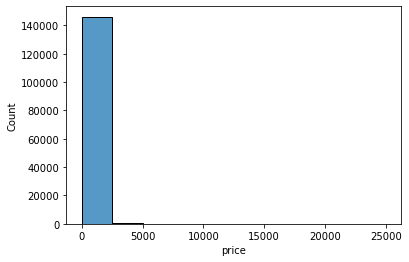

In [16]:
sns.histplot(df_cities['price'], bins=10)

In [17]:
df_cities.query('price>=10000').value_counts()

city             price
San Diego        10000    86
Columbus         10000    24
Los Angeles      10000    11
San Diego        24999    11
New York City    10000     6
Austin           10000     5
Los Angeles      15000     3
Seattle          10000     2
Denver           10000     2
San Francisco    10000     2
Los Angeles      18000     1
                 24999     1
                 21053     1
                 14500     1
                 15339     1
Austin           11373     1
Los Angeles      12750     1
                 12500     1
                 11799     1
                 11500     1
                 11000     1
Chicago          10000     1
Washington D.C.  10000     1
dtype: int64

In [18]:
df_cities.query('price<=15').value_counts()

city             price
New York City    0        25
Austin           15       12
Seattle          15       11
Los Angeles      0        10
                 15        9
San Diego        10        7
Chicago          15        7
Seattle          10        7
Los Angeles      10        5
New York City    10        5
Austin           10        5
Chicago          10        4
Austin           1         4
New York City    15        4
Los Angeles      14        4
                 13        3
San Francisco    10        3
Portland         10        3
Los Angeles      12        3
New York City    11        2
                 14        2
Portland         15        2
Denver           10        2
Chicago          14        2
Seattle          0         2
Boston           0         2
Austin           12        2
San Diego        13        1
                 14        1
                 12        1
                 15        1
                 0         1
Washington D.C.  0         1
Austin           0  

In [19]:
# So the histogram let us know that 1) we have a lot of stuff in the under $10 a night range however, it's crazy hard to read
# As such I did a few quries in a row to see what the upper limit of madness was and I settled on $10000 being the upper limit
# and 10 will be the lower. So now we need to make the frame fall into that gap
df_cities=df_cities.query('price>=10 and price<=10000')

In [20]:
df_cities.describe()

,price
count,146776.000000
mean,196.674559
std,499.391900
min,10.000000
25%,70.000000
50%,110.000000
75%,188.000000
max,10000.000000


# Let's map it up

In [21]:
#so first we set up the general map plan.
# I looked it up and 39.8283,-98.5795 is the center of the US, so I just rounded up.
map = folium.Map(location=[40,-100],zoom_start=1.5)

In [22]:
folium.Choropleth(geo_data=geo_bnb, data=df_cities, columns=['city','price'], key_on='feature.properties.name', fill_color='Blues',fill_opacity=0.6, line_opacity=0.1, legend_name='Price').add_to(map)
folium.LayerControl().add_to(map)
map

ok so ... well ... on the one hand, it worked so cool beans. On the other hand _it kinda didn't_. That is ok though, it just means I wasn't payign enoug attention to the .json file I found. Looks like all the info it has is just points, which will probably be helpful in another project down the line _but not this one_.

so plan moving forward. We will use the state thing from the lesson because _at least we know that works_ . well derive a new column based on what is written in the thing. Which is gonna be a little more labor intensive than I want but honestly, what the fuck ever at this point. This shit is insane. We can just make a list of what cities are in what states. Theres only like 30+ cities so it's not that big of a deal. We can even just do the ones we were just looking at. It's not _really_ what I want to look at but it'll suffice for now honestly.

for now I'm going to stop and do something else because I'm going crazy with this shit.

# Go back a few steps...
### We're going back a little here and going to set up a new column with states, set up a smaller frame with _states_ and price, and then use a .json we know works.

In [23]:
#ok we need to bring in the new .json
state_geo=r'C:\Users\evras\Desktop\Project A6\01 Data\01 Original\us-states.json'

In [24]:
#ok next step is to set up what cities go into what states. I'll make some lists to compare to, and we'll get the new column from that
california=['Los Angeles', 'Oakland','Pacific Grove','San Clara Country', 'San Diego', 'San Francisco', 'San Mateo County', 'Santa Cruz County']
colorado=['Denver']
florida=['Broward County']
hawaii=['Hawaii']
illinois=['Chicago']
louisiana=['New Orleans']
massachusetts=['Boston','Cambridge']
minnesota=['Twin Cities MSA']
nevada=['Clark County']
new_jersey=['Jersey City']
new_york=['New York City']
north_carolina=['Asheville']
ohio=['Columbus']
oregon=['Portland','Salem']
rhode_island=['Rhode Island']
tennessee=['Nashville']
texas=['Austin']
washington=['Seattle']
washington_dc=['Washington D.C.']

In [25]:
# ok.... next up the new columns
df_bnb.loc[df_bnb['city'].isin(california),'state']='California'
df_bnb.loc[df_bnb['city'].isin(colorado),'state']='Colorado'
df_bnb.loc[df_bnb['city'].isin(florida),'state']='Florida'
df_bnb.loc[df_bnb['city'].isin(hawaii),'state']='Hawaii'
df_bnb.loc[df_bnb['city'].isin(illinois),'state']='Illinois'
df_bnb.loc[df_bnb['city'].isin(louisiana),'state']='Louisiana'
df_bnb.loc[df_bnb['city'].isin(massachusetts),'state']='Massachusetts'
df_bnb.loc[df_bnb['city'].isin(minnesota),'state']='Minnesota'
df_bnb.loc[df_bnb['city'].isin(nevada),'state']='Nevada'
df_bnb.loc[df_bnb['city'].isin(new_jersey),'state']='New Jersey'
df_bnb.loc[df_bnb['city'].isin(new_york),'state']='New York'
df_bnb.loc[df_bnb['city'].isin(north_carolina),'state']='North Carolina'
df_bnb.loc[df_bnb['city'].isin(ohio),'state']='Ohio'
df_bnb.loc[df_bnb['city'].isin(oregon),'state']='Oregon'
df_bnb.loc[df_bnb['city'].isin(rhode_island),'state']='Rhode Island'
df_bnb.loc[df_bnb['city'].isin(tennessee),'state']='Tennessee'
df_bnb.loc[df_bnb['city'].isin(texas),'state']='Texas'
df_bnb.loc[df_bnb['city'].isin(washington),'state']='Washington'
df_bnb.loc[df_bnb['city'].isin(washington_dc),'state']='Washington D.C.'
#big shout out to Larry Tessler and Tim Mott for creating copy&paste!

In [26]:
# I'll spare you the list, but I made an excel list with counts for how many listings each state should have so I could tell if this worked
df_bnb['state'].value_counts().sort_index(ascending=True)

California         65889
Colorado            4200
Florida            10857
Hawaii             22434
Illinois            6397
Louisiana           6408
Massachusetts       4367
Minnesota           6465
Nevada              8408
New Jersey          2488
New York           45738
North Carolina      2074
Ohio                1409
Oregon              4483
Rhode Island        3884
Tennessee           6139
Texas              10436
Washington          6575
Washington D.C.     7349
Name: state, dtype: int64

In [27]:
#it worked =D little tedious, but it got the job done.

In [28]:
df_bnb.head()

,listing_id,listing_name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,city,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,state
0,38585,Charming Victorian home - twin beds + breakfast,165529,None,28804,35.65146,-82.62792,Asheville,Private room,60,1,138,16/02/20,1.14,1,0,North Carolina
1,80905,French Chic Loft,427027,None,28801,35.59779,-82.55540,Asheville,Entire home/apt,470,1,114,7/9/2020,1.03,11,288,North Carolina
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,None,28801,35.60670,-82.55563,Asheville,Entire home/apt,75,30,89,30/11/19,0.81,2,298,North Carolina
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,None,28806,35.57864,-82.59578,Asheville,Entire home/apt,90,1,267,22/09/20,2.39,5,0,North Carolina
4,160594,Historic Grove Park,769252,None,28801,35.61442,-82.54127,Asheville,Private room,125,30,58,19/10/15,0.52,1,0,North Carolina


In [29]:
df_bnb.shape

(226000, 17)

In [30]:
# ok, so now we'll make the new frame with a couple of criteria.
# The only columns we need are state and price. Then keep it between $10 and $1000 since that's where almost everything exists
df_states=df_bnb[['state','price']]

In [31]:
df_states.head()

,state,price
0,North Carolina,60
1,North Carolina,470
2,North Carolina,75
3,North Carolina,90
4,North Carolina,125


In [32]:
#looks good
#now to bring it into the price range. The histogram we did a few steps back still applies to this set since all we did was add a column and didn't chang anything
# as such I feel like a signifigant enough chunk of the pricing falls between 10-1000 a night than anything above or below that is weird
df_states=df_states.query('price>=10 and price<=1000')

In [33]:
df_states['state'].value_counts().sort_index(ascending=True)

California         64445
Colorado            4160
Florida            10550
Hawaii             21708
Illinois            6347
Louisiana           6361
Massachusetts       4353
Minnesota           5616
Nevada              8266
New Jersey          2481
New York           45434
North Carolina      2065
Ohio                1378
Oregon              4458
Rhode Island        3796
Tennessee           6048
Texas              10090
Washington          6559
Washington D.C.     7236
Name: state, dtype: int64

In [34]:
#going to do a quick count to see if the bounds worked.
df_states.describe()

,price
count,221351.000000
mean,168.148488
std,155.110353
min,10.000000
25%,75.000000
50%,120.000000
75%,200.000000
max,1000.000000


## Once more into the map

In [35]:
#ok lets give it a go

map2 = folium.Map(location=[40,-100],zoom_start=1.5)

folium.Choropleth(geo_data=state_geo, data=df_states, columns=['state','price'], key_on='feature.properties.name', fill_color='YlOrBr',fill_opacity=0.6, line_opacity=0.1, legend_name='Price').add_to(map2)

folium.LayerControl().add_to(map2)
map2

At the end of the day I think the biggest thing here is how woefully lacking the data is. Just in the sense that only 18 states and Washing DC are covered. On the other hand, one thing I certainly didn't see coming was how expensive Tennessee and North Carolina are. Given that I evened out the price range to exclude the really crazy high ones I think this gave most regions a more fair shake. None of the states lost a ton of counts, which means to me that those extreems were worth getting rid of. I expected California to be more in the dark orange or brown colors, but it's in the middle.

I wouldn't go so far as to say this really answers my questions, but it does raise a few. For example, there are a few states with more than one city listed (I'm looking at you Cali), What would happen if I just looked at those with their most 'populated' cities. In terms of listings ... although maybe also population?

I have a few questions I can't really get answered out of this chart. I'm curious for example of a regions actual population has any meaningful impact. It's not something available in the data set but it would be possible (if not a little tricky since a fair chunk of the cities _aren't cities_).

I'll deffinetly want to look into what commonalities the top regions have. Tennessee, North Carolina, and Rhode Island. Do they all just have a weird glut of high end listings? if so _WHY_. Nothing against those states but like, they've got nothing going as far as I know. Perhaps some conventions or something? I'll need to look into it.

When all is said and done I feel good about how the final map came out. I learned _a ton_ on the way to this point because of all the obstacles that showed up. Anyway, time for a deep breath and then 6.4!

In [37]:
#now that it's all done let's save the df with states in it.
df_bnb.to_pickle(os.path.join(path,'02 Altered','airbnb_v2_states.pkl'))